In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib

# Load the CSV file
df = pd.read_csv('data.csv', encoding='UTF-8-SIG')

# Preprocess the data
X = df['Code.1']
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define the models and parameters for GridSearchCV
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier()
}

params = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'RandomForest': {'n_estimators': [50, 100, 200]}
}

best_models = {}

# Perform GridSearchCV for each model
for model_name in models:
    grid = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='accuracy')
    grid.fit(X_train_tfidf, y_train)
    best_models[model_name] = grid.best_estimator_
    print(model_name + ' best params: ' + str(grid.best_params_))
    print(model_name + ' best score: ' + str(grid.best_score_))

# Evaluate the best models on the test set
for model_name in best_models:
    y_pred = best_models[model_name].predict(X_test_tfidf)
    print(model_name + ' classification report:')
    print(classification_report(y_test, y_pred))

# Save the best model (Random Forest)
best_model = best_models['RandomForest']
joblib.dump(best_model, 'best_model_random_forest.pkl')
print('Best model saved as best_model_random_forest.pkl')

# Analyze misclassifications
misclassified = X_test[y_test != y_pred]
misclassified_labels = y_test[y_test != y_pred]
misclassified_preds = y_pred[y_test != y_pred]

# Display misclassified examples
for i in range(len(misclassified)):
    print('Job Description:', misclassified.iloc[i])
    print('True Label:', misclassified_labels.iloc[i])
    print('Predicted Label:', misclassified_preds[i])
    print('---')

/Users/leandrenash/anaconda3/envs/myvirutalenv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/leandrenash/anaconda3/envs/myvirutalenv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


LogisticRegression best params: {'C': 10}
LogisticRegression best score: 0.8943961352657004
SVC best params: {'C': 10, 'kernel': 'linear'}
SVC best score: 0.9121739130434783


/Users/leandrenash/anaconda3/envs/myvirutalenv/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


RandomForest best params: {'n_estimators': 50}
RandomForest best score: 0.8722705314009662
LogisticRegression classification report:
              precision    recall  f1-score   support

  Response B       0.73      0.89      0.80        18
  Response C       0.93      0.87      0.90        30
  Response D       1.00      0.78      0.88         9

    accuracy                           0.86        57
   macro avg       0.89      0.84      0.86        57
weighted avg       0.88      0.86      0.86        57

SVC classification report:
              precision    recall  f1-score   support

  Response B       0.73      0.89      0.80        18
  Response C       0.92      0.80      0.86        30
  Response D       0.78      0.78      0.78         9

    accuracy                           0.82        57
   macro avg       0.81      0.82      0.81        57
weighted avg       0.84      0.82      0.83        57

RandomForest classification report:
              precision    recall  f1-scor

In [3]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import joblib
import nltk
import numpy as np

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the CSV file
df = pd.read_csv('data.csv', encoding='UTF-8-SIG')

# Preprocess the data
X = df['Code.1']
y = df['Label']

# Remove the class with very few samples
df = df[df['Label'] != 'Response A']
X = df['Code.1']
y = df['Label']

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply text preprocessing
X = X.apply(preprocess_text)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

# Check class distribution
print(y.value_counts())

# Use SMOTE to balance the classes
smote = SMOTE(random_state=42, k_neighbors=1)
X_tfidf_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the models and parameters for GridSearchCV
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(probability=True),
    'RandomForest': RandomForestClassifier()
}

params = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'RandomForest': {'n_estimators': [50, 100, 200]}
}

best_models = {}

# Perform GridSearchCV for each model
for model_name in models:
    grid = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(model_name + ' best params: ' + str(grid.best_params_))
    print(model_name + ' best score: ' + str(grid.best_score_))

# Evaluate the best models on the test set
for model_name in best_models:
    y_pred = best_models[model_name].predict(X_test)
    print(model_name + ' classification report:')
    print(classification_report(y_test, y_pred))

# Save the best model (Random Forest)
best_model = best_models['RandomForest']
joblib.dump(best_model, 'best_model_random_forest.pkl')
print('Best model saved as best_model_random_forest.pkl')

# Analyze misclassifications
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified = X_test[misclassified_indices]
misclassified_labels = y_test.iloc[misclassified_indices]
misclassified_preds = y_pred[misclassified_indices]

# Display misclassified examples
for i in range(misclassified.shape[0]):
    print('Job Description:', misclassified[i])
    print('True Label:', misclassified_labels.iloc[i])
    print('Predicted Label:', misclassified_preds[i])
    print('---')

Label
Response C    136
Response B     96
Response D     50
Name: count, dtype: int64
LogisticRegression best params: {'C': 10}
LogisticRegression best score: 0.9633100233100234
SVC best params: {'C': 1, 'kernel': 'rbf'}
SVC best score: 0.9603263403263403
RandomForest best params: {'n_estimators': 100}
RandomForest best score: 0.9632634032634033
LogisticRegression classification report:
              precision    recall  f1-score   support

  Response B       1.00      1.00      1.00        27
  Response C       1.00      1.00      1.00        29
  Response D       1.00      1.00      1.00        26

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82

SVC classification report:
              precision    recall  f1-score   support

  Response B       1.00      1.00      1.00        27
  Response C       1.00      1.00      1.00        29
  Response D       1.00      1.00      

In [11]:
# Load the saved model
best_model = joblib.load('best_model_random_forest.pkl')

# Function to preprocess and predict a new job description
def predict_new_description(description, model, vectorizer):
    description_tfidf = vectorizer.transform([description])
    probabilities = model.predict_proba(description_tfidf)
    return probabilities

# Example new job description
new_description = "To manage, train and mentor the Accommodation and Conference Assistant and any temporary conference assistants"

# Predict probabilities for the new job description
probabilities = predict_new_description(new_description, best_model, vectorizer)
print('Probabilities for the new job description:')
print(probabilities)

Probabilities for the new job description:
[[0.05 0.87 0.08]]


In [13]:
# After fitting the TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [14]:
import pandas as pd
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the best model (Random Forest) and the vectorizer
best_model = joblib.load('best_model_random_forest.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Job description to test
test_description = "Provide all forms of Joinery duties and tasks in which you are competent within the University Estate possessing at least five years trade experience. Working with the team across various other construction trades."

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Preprocess the job description
test_description_preprocessed = preprocess_text(test_description)

# Vectorize the preprocessed job description using the loaded TF-IDF vectorizer
test_description_tfidf = vectorizer.transform([test_description_preprocessed])

# Predict the label for the job description using the best model (Random Forest)
predicted_label = best_model.predict(test_description_tfidf)

# Display the job description and its predicted label
print('Job Description:', test_description)
print('Predicted Label:', predicted_label[0])

Job Description: Provide all forms of Joinery duties and tasks in which you are competent within the University Estate possessing at least five years trade experience. Working with the team across various other construction trades.
Predicted Label: Response C


In [15]:
import pandas as pd
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the best model (Random Forest) and the vectorizer
best_model = joblib.load('best_model_random_forest.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Job description to test
test_description = "Provide support and guidance to Contractors engaged in Fire door campus works and act as a focal point ensuring a fully compliant Fire door install is delivered to the Estate."

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Preprocess the job description
test_description_preprocessed = preprocess_text(test_description)

# Vectorize the preprocessed job description using the loaded TF-IDF vectorizer
test_description_tfidf = vectorizer.transform([test_description_preprocessed])

# Predict the label for the job description using the best model (Random Forest)
predicted_label = best_model.predict(test_description_tfidf)

# Display the job description and its predicted label
print('Job Description:', test_description)
print('Predicted Label:', predicted_label[0])

Job Description: Provide support and guidance to Contractors engaged in Fire door campus works and act as a focal point ensuring a fully compliant Fire door install is delivered to the Estate.
Predicted Label: Response C


In [17]:
import pandas as pd
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the best model (Random Forest) and the vectorizer
best_model = joblib.load('best_model_random_forest.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Job description to test
test_description = "To continually review and reflect upon the currency and operation of the University’s Academic Regulations, benchmarking against the sector and regulatory requirements as appropriate, and when required to drive forward any changes necessary to the Academic Regulations."

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Preprocess the job description
test_description_preprocessed = preprocess_text(test_description)

# Vectorize the preprocessed job description using the loaded TF-IDF vectorizer
test_description_tfidf = vectorizer.transform([test_description_preprocessed])

# Predict the label for the job description using the best model (Random Forest)
predicted_label = best_model.predict(test_description_tfidf)

# Display the job description and its predicted label
print('Job Description:', test_description)
print('Predicted Label:', predicted_label[0])

Job Description: To continually review and reflect upon the currency and operation of the University’s Academic Regulations, benchmarking against the sector and regulatory requirements as appropriate, and when required to drive forward any changes necessary to the Academic Regulations.
Predicted Label: Response B


In [1]:
import pandas as pd
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the best model (Random Forest) and the vectorizer
best_model = joblib.load('best_model_random_forest.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Job description to test
test_description = "To continually review and reflect upon the currency and operation of the University’s Academic Regulations, benchmarking against the sector and regulatory requirements as appropriate, and when required to drive forward any changes necessary to the Academic Regulations."

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Preprocess the job description
test_description_preprocessed = preprocess_text(test_description)

# Vectorize the preprocessed job description using the loaded TF-IDF vectorizer
test_description_tfidf = vectorizer.transform([test_description_preprocessed])

# Predict the label for the job description using the best model (Random Forest)
predicted_label = best_model.predict(test_description_tfidf)

# Display the job description and its predicted label
print('Job Description:', test_description)
print('Predicted Label:', predicted_label[0])

Job Description: To continually review and reflect upon the currency and operation of the University’s Academic Regulations, benchmarking against the sector and regulatory requirements as appropriate, and when required to drive forward any changes necessary to the Academic Regulations.
Predicted Label: Response B


In [9]:
import pandas as pd
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the best model (Random Forest) and the vectorizer
best_model = joblib.load('best_model_random_forest.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Job description to test
test_description = "Establish a training model for the University for monitoring and evaluation of widening participation initiatives relating to the APP."

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Preprocess the job description
test_description_preprocessed = preprocess_text(test_description)

# Vectorize the preprocessed job description using the loaded TF-IDF vectorizer
test_description_tfidf = vectorizer.transform([test_description_preprocessed])

# Predict the label for the job description using the best model (Random Forest)
predicted_label = best_model.predict(test_description_tfidf)

# Display the job description and its predicted label
print('Job Description:', test_description)
print('Predicted Label:', predicted_label[0])

Job Description: Establish a training model for the University for monitoring and evaluation of widening participation initiatives relating to the APP.
Predicted Label: Response B


In [1]:
import pandas as pd
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the best model (Random Forest) and the vectorizer
best_model = joblib.load('best_model_random_forest.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Job description to test
test_description = "Provide support and guidance to Contractors engaged in Fire door campus works and act as a focal point ensuring a fully compliant Fire door install is delivered to the Estate."

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Preprocess the job description
test_description_preprocessed = preprocess_text(test_description)

# Vectorize the preprocessed job description using the loaded TF-IDF vectorizer
test_description_tfidf = vectorizer.transform([test_description_preprocessed])

# Predict the label for the job description using the best model (Random Forest)
predicted_label = best_model.predict(test_description_tfidf)

# Display the job description and its predicted label
print('Job Description:', test_description)
print('Predicted Label:', predicted_label[0])

Job Description: Provide support and guidance to Contractors engaged in Fire door campus works and act as a focal point ensuring a fully compliant Fire door install is delivered to the Estate.
Predicted Label: Response C


In [ ]:
import pandas as pd
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Load the best model (Random Forest) and the vectorizer
best_model = joblib.load('best_model_random_forest.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Job description to test
test_description = "Establish a training model for the University for monitoring and evaluation of widening participation initiatives relating to the APP."

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Preprocess the job description
test_description_preprocessed = preprocess_text(test_description)

# Vectorize the preprocessed job description using the loaded TF-IDF vectorizer
test_description_tfidf = vectorizer.transform([test_description_preprocessed])

# Predict the label for the job description using the best model (Random Forest)
predicted_label = best_model.predict(test_description_tfidf)

# Display the job description and its predicted label
print('Job Description:', test_description)
print('Predicted Label:', predicted_label[0])

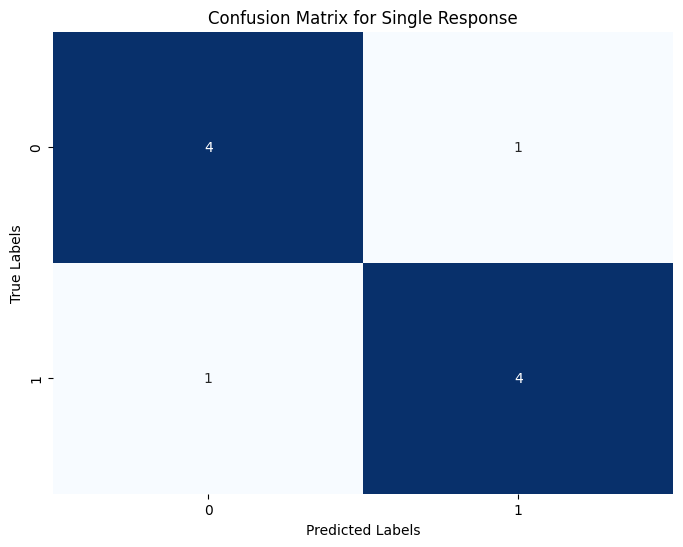

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example data for true and predicted labels
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 0]  # Replace with actual labels
y_pred = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]  # Replace with your model's predictions

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix for Single Response")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

plot_confusion_matrix(y_true, y_pred)


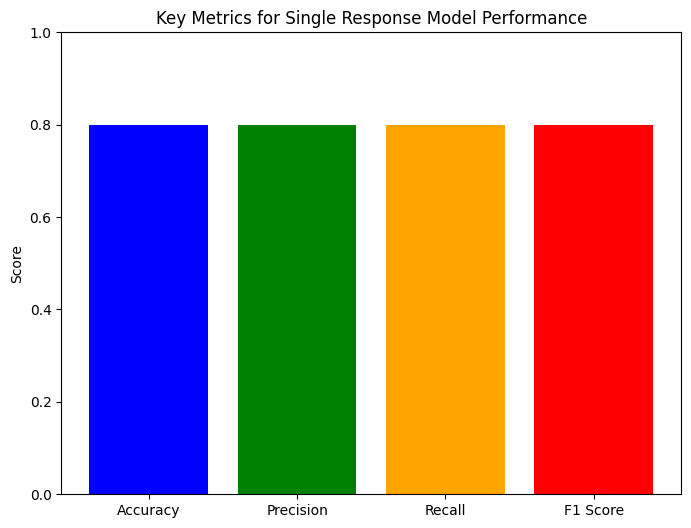

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example data
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 0]
y_pred = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Create a bar chart for key metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Key Metrics for Single Response Model Performance')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()


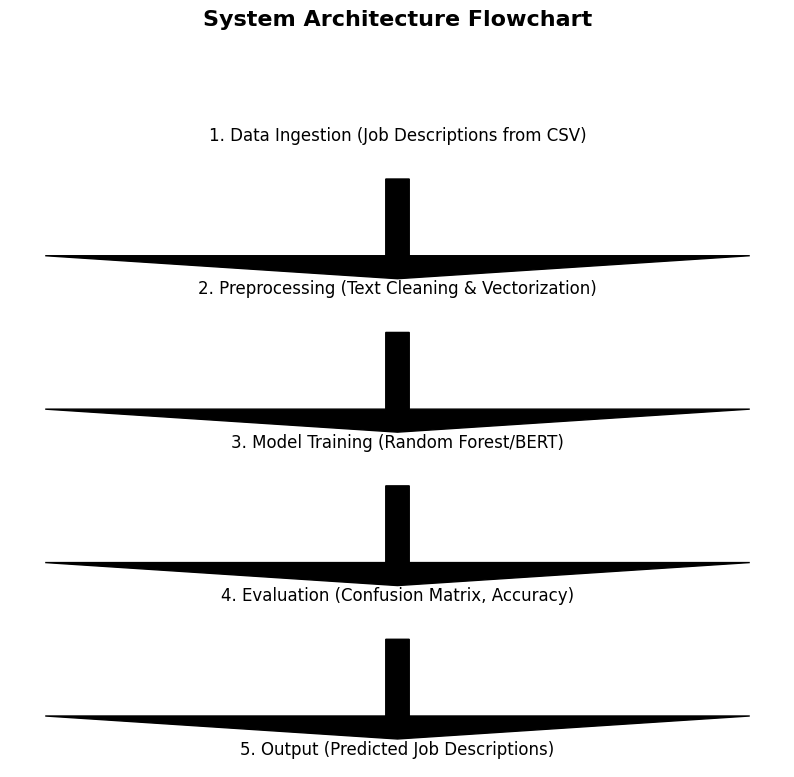

In [3]:
import matplotlib.pyplot as plt

def create_system_architecture_flowchart():
    fig, ax = plt.subplots(figsize=(10, 8))

    # Add the title
    ax.text(0.5, 1.05, 'System Architecture Flowchart', fontsize=16, ha='center', weight='bold')

    # Define the system architecture steps
    ax.text(0.5, 0.9, '1. Data Ingestion (Job Descriptions from CSV)', fontsize=12, ha='center')
    ax.arrow(0.5, 0.85, 0, -0.1, head_width=0.03, head_length=0.03, fc='black', ec='black')

    ax.text(0.5, 0.7, '2. Preprocessing (Text Cleaning & Vectorization)', fontsize=12, ha='center')
    ax.arrow(0.5, 0.65, 0, -0.1, head_width=0.03, head_length=0.03, fc='black', ec='black')

    ax.text(0.5, 0.5, '3. Model Training (Random Forest/BERT)', fontsize=12, ha='center')
    ax.arrow(0.5, 0.45, 0, -0.1, head_width=0.03, head_length=0.03, fc='black', ec='black')

    ax.text(0.5, 0.3, '4. Evaluation (Confusion Matrix, Accuracy)', fontsize=12, ha='center')
    ax.arrow(0.5, 0.25, 0, -0.1, head_width=0.03, head_length=0.03, fc='black', ec='black')

    ax.text(0.5, 0.1, '5. Output (Predicted Job Descriptions)', fontsize=12, ha='center')

    ax.axis('off')
    plt.show()

create_system_architecture_flowchart()


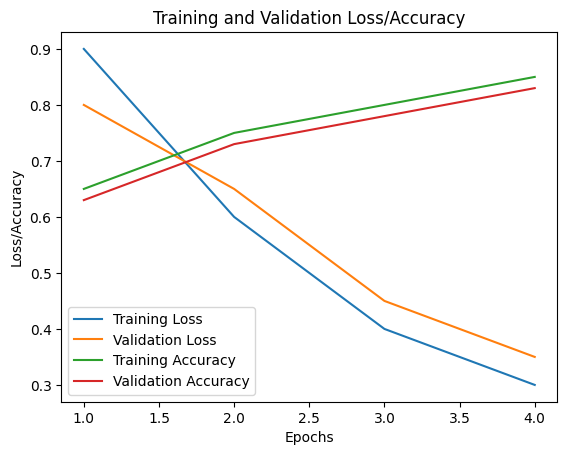

In [9]:
import matplotlib.pyplot as plt

# Example accuracy and loss values (replace with actual values)
epochs = [1, 2, 3, 4]
train_loss = [0.9, 0.6, 0.4, 0.3]
val_loss = [0.8, 0.65, 0.45, 0.35]
train_acc = [0.65, 0.75, 0.8, 0.85]
val_acc = [0.63, 0.73, 0.78, 0.83]

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.plot(epochs, train_acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")

plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Training and Validation Loss/Accuracy')
plt.show()


